In [ ]:
from IPython.display import display_html
def restartkernel(): display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
try: restartkernel()
except: pass

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

In [ ]:
# from condensate import Condensate, Environment

In [2]:
from condensate.core import gpcore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import tqdm
import time
import h5py
import pandas as pd
from scipy.ndimage import rotate as rotate_image
from scipy.optimize import curve_fit
import matplotlib.animation as animation
from IPython.display import HTML

In [5]:
# constants
hbar = 1.05e-34
a0 = 5.3e-11

In [57]:
class Condensate():
    def __init__(self, DIM=512, fov=400e-6, N=1e6, omegaz=10, a_s=100*a0, mass=3.8e-26):
        self.DIM = DIM
        self.fov = fov
        self.N = N
        self.omegaz = omegaz
        self.a_s = a_s
        self.mass = mass
        self.g = N* 4 * np.pi * (hbar**2) * (a_s  / mass)
        self.g *= np.sqrt(mass * omegaz / (2*np.pi*hbar))
        self.omega = 2*np.pi
        self.epsilon = 0
        self.lb = np.sqrt(hbar / (2*mass *self.omega))
        self.Psi = (1+0.j)*np.zeros((DIM,DIM))
        self.V = np.zeros((DIM,DIM))
        
        self.initialize_Psi()
    
    def initialize_Psi(self, width=100):
        for i in range(self.DIM):
            for j in range(self.DIM):
                self.Psi[i,j] = np.exp(-( (i-self.DIM//2)/width)** 2.  -  ((j-self.DIM//2)/width)** 2. ) + 1.j
        
    def harmonic_potential(self, omega, epsilon):
        self.omega = omega
        self.lb = np.sqrt(hbar / (2*mass *omega))
        self.epsilon = epsilon
    
    def relax(self, dt=1e-3):
        gpcore.Setup(self.DIM, self.fov, self.g, dt, True, 0.0)
        gpcore.SetHarmonicPotential(self.omega, self.epsilon) 
        gpcore.Evolve(self.Psi,1000, 40, True, 5e7)
        
    def evolve(self, dt=1e-4):
        gpcore.Setup(self.DIM, self.fov, self.g, dt, False, 0.01)
        gpcore.SetHarmonicPotential(self.omega, self.epsilon) 
        gpcore.Evolve(self.Psi,0, 40, True, 5e7)
        
    def show_density(self,):
        self.n = np.abs(self.Psi) ** 2
        plt.imshow(self.n)
        plt.colorbar()
        plt.show()

In [58]:
c = Condensate()

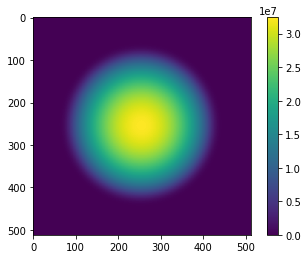

In [62]:
c.show_density()

In [60]:
c.relax()

In [64]:
c.evolve()

In [63]:
c.harmonic_potential(c.omega,0.2)